In [1]:
import pandas as pd
import json

In [2]:
questions = pd.read_json("../data/raw/quiz_data.json")['quiz']
data = json.load(open("../data/raw/quiz_submission_data.json"))
nested_data = {"data":data}
response = pd.DataFrame(nested_data)["data"]

In [3]:
questions.keys()

Index(['id', 'name', 'title', 'description', 'difficulty_level', 'topic',
       'time', 'is_published', 'created_at', 'updated_at', 'duration',
       'end_time', 'negative_marks', 'correct_answer_marks', 'shuffle',
       'show_answers', 'lock_solutions', 'is_form', 'show_mastery_option',
       'quiz_type', 'is_custom', 'banner_id', 'exam_id', 'show_unanswered',
       'ends_at', 'lives', 'live_count', 'coin_count', 'questions_count',
       'daily_date', 'max_mistake_count', 'questions'],
      dtype='object')

In [4]:
response.keys()

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz', 'next_steps'],
      dtype='object')

In [5]:
quiz = questions[["title", "topic", "negative_marks", "correct_answer_marks", "questions_count", "max_mistake_count"]]
questions = questions["questions"]
user = response[["score", "accuracy", "final_score", "negative_score", "correct_answers", "incorrect_answers", "total_questions", "quiz"]]
response = response["response_map"]

In [6]:
strengths = []
weaknesses = []
at = 0
for item in response.items():
    for i in range(at, len(questions) - 1):
        if str(questions[i]["id"]) == item[0]:
            for j in questions[i]["options"]:
                if j["id"] == item[1]:
                    log_entry = {
                        "question": questions[i]["description"],  # Log the question
                        "explanation": questions[i]["detailed_solution"] # Log explanation
                    }
                    if j["is_correct"] == True:
                        strengths.append(log_entry)
                        at = i
                        continue
                    else:
                        weaknesses.append(log_entry)
                        at = i
                        continue

In [8]:
from prompt import prompt, llm

prompt = prompt.format(strengths = strengths, weaknesses = weaknesses)
result = llm.invoke(prompt).content
result

'[\n  {\n    "strengths": {\n      "description": "Detailed understanding of cell junctions, connective tissue types, and the frog\'s heart structure and function",\n      "topics": [\n        "cell junctions",\n        "connective tissue types (areolar tissue, cartilage, hyaline cartilage, elastic cartilage, fibrocartilage)",\n        "frog\'s heart structure and function"\n      ]\n    }\n  },\n  {\n    "weaknesses": {\n      "description": "Lack of understanding of the release of endocrine glands\' secretions and the location of vasa efferentia in the male frog\'s kidney",\n      "topics": [\n        "endocrine glands\' secretions",\n        "male frog\'s anatomy (vasa efferentia, kidney)"\n      ]\n    }\n  }\n]'

In [9]:
import json

data = json.loads(result)

strengths = data[0]
weaknesses = data[1]

In [10]:
strengths

{'strengths': {'description': "Detailed understanding of cell junctions, connective tissue types, and the frog's heart structure and function",
  'topics': ['cell junctions',
   'connective tissue types (areolar tissue, cartilage, hyaline cartilage, elastic cartilage, fibrocartilage)',
   "frog's heart structure and function"]}}

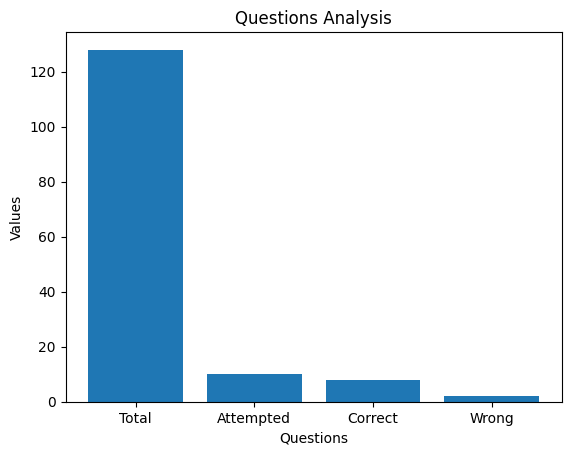

In [11]:
import matplotlib.pyplot as plt

names = ['Total', 'Attempted', 'Correct', 'Wrong']
values = [user["total_questions"], user["correct_answers"]+user["incorrect_answers"], user["correct_answers"], user["incorrect_answers"]]

plt.bar(names, values)
plt.title('Questions Analysis')
plt.xlabel('Questions')
plt.ylabel('Values')
plt.show()

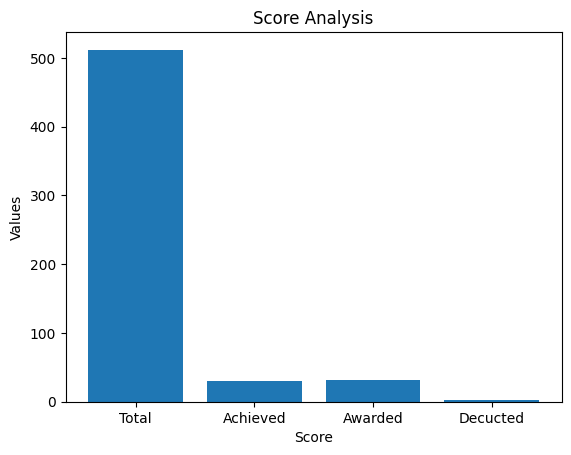

In [12]:
import matplotlib.pyplot as plt

names = ['Total', 'Achieved', 'Awarded', 'Decucted']
values = [user["total_questions"]*int(float(user["quiz"]["correct_answer_marks"])), int(float(user["final_score"])), user["score"], int(float(user["negative_score"]))]

plt.bar(names, values)
plt.title('Score Analysis')
plt.xlabel('Score')
plt.ylabel('Values')
plt.show()